In [1]:
import matplotlib.pyplot as plt
import numpy as np
import IsingLib

In [3]:
bit = 20
value = 2 ** bit - 1
num = 20
qubo = 'qubo'
ising = 'ising'
mat = np.random.randint(-value, value, (num, num))
model = IsingLib.Model(qubo, H1=mat)

In [4]:
model.compile()
qubo_mat, qubo_c = model.get_matrix(qubo)
ising_mat, ising_c = model.to_ising()

In [5]:
qubo_bf = IsingLib.Bulletforce(qubo_mat, qubo_c, qubo)
ising_bf = IsingLib.Bulletforce(ising_mat, ising_c, ising)

(-18893052.0, [(0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)])


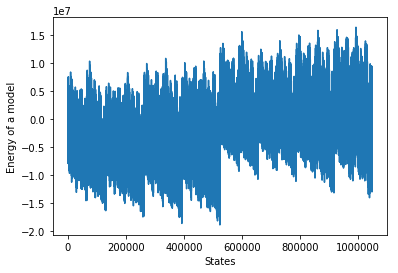

(-75572208.0, [(-1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1)])


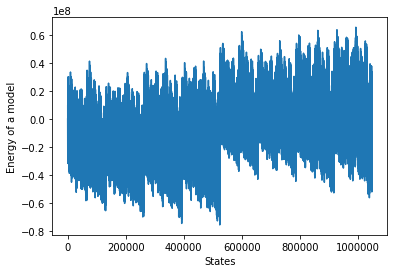

In [6]:
qubo_bf_optimal = qubo_bf.get_optimal()
print(qubo_bf_optimal)
qubo_bf.draw_eng()

ising_bf_optimal = ising_bf.get_optimal()
print(ising_bf_optimal)
ising_bf.draw_eng()

In [7]:
re = IsingLib.Reduce(org_mat)

NameError: name 'org_mat' is not defined

[[ 3. -1.  1.  3.  2. -1. -1. -3. -1. -3.  2. -3. -3. -2. -1.  3.  3. -1.
   1. -1.]
 [ 0. -2. -1.  1.  2.  1.  2.  3.  2.  1. -3. -1.  1.  1.  3.  1. -1. -1.
   3.  3.]
 [ 0.  0.  1.  1. -1.  1. -3. -2. -3.  3.  1.  2. -1. -1. -1.  3. -2.  3.
   1. -3.]
 [ 0.  0.  0.  1. -3. -1. -2.  1. -2.  1.  3.  1. -2.  2.  1. -1.  2. -1.
  -1. -3.]
 [ 0.  0.  0.  0.  3.  3. -1. -1.  2. -3.  1. -2.  2. -2.  3. -1. -1. -1.
   1. -1.]
 [ 0.  0.  0.  0.  0. -1.  3. -2.  1. -3.  1. -1. -2. -2.  1.  1. -3. -2.
   1. -2.]
 [ 0.  0.  0.  0.  0.  0.  3. -3.  2. -1. -2.  2.  1. -1. -2. -1.  1. -2.
   3. -3.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  1. -1. -1.  1. -1.  1. -3. -1. -2.  3.
  -1. -3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  1.  1. -1. -2. -1.  2.  2. -1.
  -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  1.  1.  1.  3.  1. -2. -3.  3.
  -1.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. -1. -3. -1. -2. -1.  2. -1.
  -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. -2. -3.  1. -1.

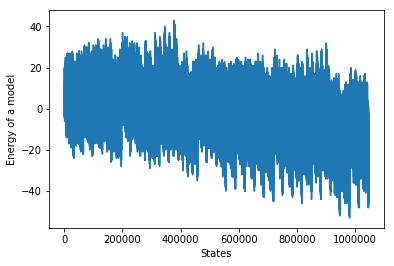

False


In [32]:
re_mat, re_c = re.gradate(3)
print(re_mat)
re_bf = IsingLib.Bulletforce(re_mat, re_c, vartype)
re_optimal = bf.get_optimal()
re_bf.draw_eng()
for state in bf_optimal[1]:
    for re_state in re_optimal[1]:
        print(state == re_state)

In [33]:
ising_re = IsingLib.Reduce(ising_mat)

[[ 1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.
   1. -1.]
 [ 0.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.
   1.  1.]
 [ 0.  0.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.
   1. -1.]
 [ 0.  0.  0.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.
  -1. -1.]
 [ 0.  0.  0.  0.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
   1. -1.]
 [ 0.  0.  0.  0.  0. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
   1. -1.]
 [ 0.  0.  0.  0.  0.  0. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.
   1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.
  -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.
  -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1. -1. -1.  1.
  -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1. -1. -1. -1. -1.  1. -1.
  -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1. -1.  1. -1.

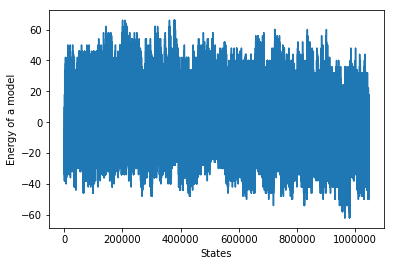

True


In [34]:
ising_re_mat, ising_re_c = ising_re.gradate(3)
print(ising_re_mat)
ising_re_bf = IsingLib.Bulletforce(ising_re_mat, ising_re_c, 'ising')
ising_re_optimal = ising_bf.get_optimal()
ising_re_bf.draw_eng()
for state in ising_bf_optimal[1]:
    for re_state in ising_re_optimal[1]:
        print(state == re_state)